In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("Salary_dataset.csv")

In [17]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [19]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


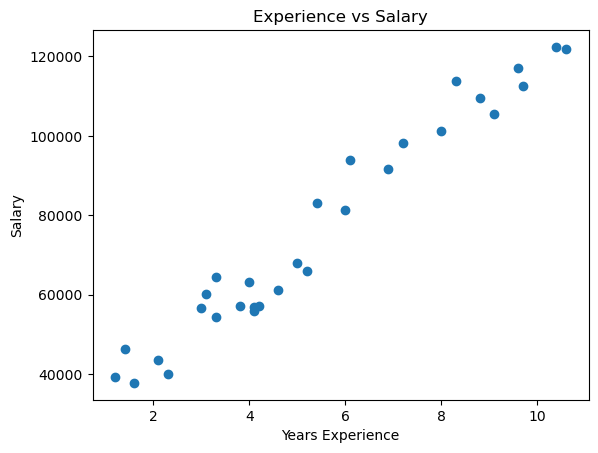

In [20]:
plt.scatter(df["YearsExperience"],df["Salary"])
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.show()

As we can see, the correlation between Experience years and salary is 0.98. Which shows strong dependence of Salary on Experience Years.

correlation of approximately 0 means zero is no relationship between the two variables where as correlation of approximately 1 or -1 means there is strong positivethe(both variables increase or decrease together) or negative (when one variable increases the other decreases) relationship between the variables respectively.

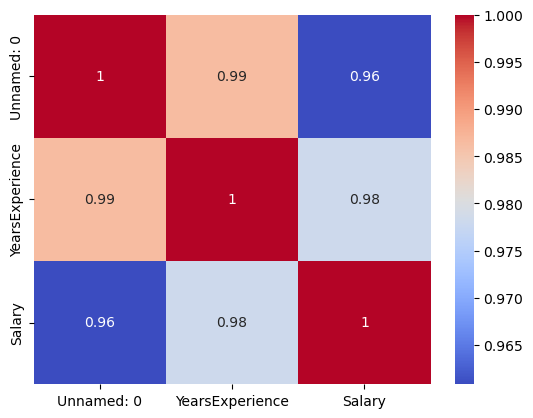

In [23]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [24]:
X = df[['YearsExperience']] 
y = df['Salary']


The other thing we should is that splitting our datast into train and test. Because once a model is fitted on the training data, It will be easier for it to predict the same data. But the real test of a model is how well it performs on unseen data. So, we split our data into training and testing sets to evaluate the model's performance on new, unseen data. 
The train and test split ratio can be different based on the size of the dataset. But commonly used ratios are 70:30 or 80:20. In this case, I have used 80:20 ratio which means 80% of the data is used for training the model and 20% is used for testing its performance.
The train_test_split function from sklearn.model_selection module is used to split the data into training and testing sets. The random_state parameter is set to ensure reproducibility of the results.

The training data and testing data shouldn't have any overlap. This means that the data points used for training the model should not be present in the testing set. This is important to ensure that the model is evaluated on completely unseen data, which provides a more accurate assessment of its performance.

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Let's Predict the salary of a person with 10 years of exoerience. To predict we use the predict method of the LinearRegression class. We pass the value of 10 years of experience as a 2D array (because the predict method expects a 2D array as input) and it returns the predicted salary for that experience level.

In [27]:
prediction = model.predict([[10]])
prediction

d:\Anacondaa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([118618.35470978])

Here what we are doing is that predicting for all of our test data with splitted earlier and we save it to y_pred variable.

In [40]:
y_pred = model.predict(X_test)

After saving the predicted values to y_pred, we can compare these predicted values with the actual values from the test set (y_test) to evaluate the performance of our linear regression model. This comparison helps us understand how well our model is able to generalize to unseen data. 

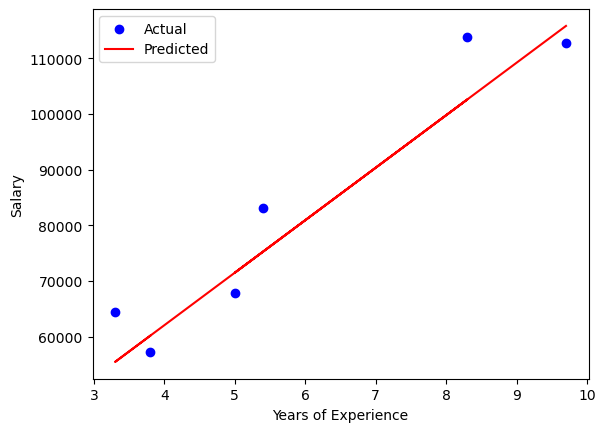

In [41]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


As we see from the output above, the line shows the predicted salaries based on the years of experience. The blue points represent the actual data points from our dataset, while the red line represents the linear regression model's predictions. The closer the red line is to the blue points, the better our model is at predicting salaries based on years of experience. This visualization helps us evaluate the performance of our linear regression model by looking at how well the predicted values align with the actual data points. But keep in mind that this is just a visual representation, and for a more quantitative evaluation, we would typically use metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared.

---

**Mean Squared Error (MSE)** is a common metric used to evaluate the performance of regression models. It measures the average of the squares of the errors—that is, the average squared difference between the predicted values and the actual values.
The formula for Mean Squared Error is given by:
MSE = (1/n) * Σ(actual_i - predicted_i)²
where:
- n is the number of data points
- actual_i is the actual value for the i-th data point
- predicted_i is the predicted value for the i-th data point

**R^2 Score**, also known as the coefficient of determination, is another metric used to evaluate the performance of regression models. It indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. The R^2 score ranges from 0 to 1, where 1 indicates that the model perfectly explains the variance in the data, and 0 indicates that the model does not explain any of the variance.
The formula for R^2 Score is given by:
R² = 1 - (SS_res / SS_tot)
where:
- SS_res is the sum of squares of residuals (Σ(actual_i - predicted_i)²)
- SS_tot is the total sum of squares (Σ(actual_i - mean_actual)²)
- mean_actual is the mean of the actual values
- actual_i is the actual value for the i-th data point
- predicted_i is the predicted value for the i-th data point
- n is the number of data points
Both MSE and R^2 Score are widely used in regression analysis to assess the accuracy and effectiveness of predictive models. Lower MSE values indicate better model performance, while higher R^2 values indicate a better fit to the data.

In [25]:
from sklearn.metrics import mean_squared_error , r2_score

In [28]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 49830096.855908334
R² Score: 0.9024461774180498
